In [1]:
import os
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import time

In [2]:
train = pd.read_csv('train.csv')

X = train.iloc[:,4:] 
X = X.iloc[:,0::2] #짝수번호만
y1 = train.loc[:, train.columns == 'layer_1']/10
y2 = train.loc[:, train.columns == 'layer_2']/10
y3 = train.loc[:, train.columns == 'layer_3']/10
y4 = train.loc[:, train.columns == 'layer_4']/10

test = pd.read_csv('test.csv')
test = test.iloc[:,1::2]

train_data = X
train_targets = train.iloc[:,:4]/10

test_data = test

,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,...,216,217,218,219,220,221,222,223,224,225
0,10,10,10,10,0.254551,0.258823,0.254659,0.252085,0.247678,0.253614,...,0.354750,0.369223,0.388184,0.408496,0.414564,0.429403,0.419225,0.443250,0.433414,0.465502
1,10,10,10,20,0.205062,0.225544,0.217758,0.202169,0.199633,0.207380,...,0.557203,0.573656,0.587998,0.612754,0.627825,0.633393,0.637706,0.625981,0.653231,0.637853
2,10,10,10,30,0.189196,0.165869,0.177655,0.156822,0.175094,0.177755,...,0.699864,0.708688,0.721982,0.713464,0.743030,0.741709,0.747743,0.746037,0.737356,0.750391
3,10,10,10,40,0.131003,0.120076,0.138975,0.117931,0.130566,0.131262,...,0.764786,0.763788,0.770017,0.787571,0.778866,0.776969,0.774712,0.801526,0.805305,0.784057
4,10,10,10,50,0.091033,0.086893,0.108125,0.080405,0.105917,0.077083,...,0.786677,0.802271,0.806557,0.799614,0.789333,0.804087,0.787763,0.794948,0.819105,0.801781


In [29]:
from keras import models
from keras import layers

import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [54]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(4))
    model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])
    return model

In [55]:
k = 3
num_val_samples = len(train_data) // k
num_epochs = 20
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()

    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0


KeyboardInterrupt: 

In [38]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

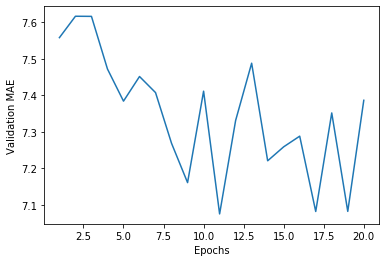

In [39]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [43]:
min(average_mae_history) # 11 epoch

7.074966907501221

In [48]:
model = build_model()

model.fit(train_data, train_targets,
          epochs=11, batch_size=16, verbose=0)

In [63]:
pred = model.predict(test_data)

pred = pd.DataFrame(pred*10)

pred.to_csv('pred_DL11.csv')